In [ ]:
important = input("you sure you want to download 1600 images?").lower()
if important == "y":
    pass
else:
    import sys
    print(f"if you want it to download a lot of images run it again and press y else just continue you currently entered {important}")

    sys.exit()    

from pexels_api import api
import os
import requests
api_key = API KEY HERE

test = api.API(api_key)
def get_the_urls(search_term, amount_of_pages=3):
    all_urls = []
    for i in range(amount_of_pages):
        entire_thing = (test.search(search_term,80,i))
        for i in range(80):
            url = (entire_thing["photos"][i]["src"]["original"])
            all_urls.append(url)
    return all_urls

travel_urls = get_the_urls("travel", 4)
nature_urls = get_the_urls("nature", 4)
outdoors_urls = get_the_urls("outdoors", 4)
interior_urls = get_the_urls("interior", 4)
outdoors_urls = get_the_urls("color", 3)
textures_urls = get_the_urls("texture", 2)

def multiple_lists_to_1(lists):
    all_lists_in_1 = []
    for object in lists:
        for string in object:
            all_lists_in_1.append(string)
    return all_lists_in_1

def download_images(filenames,last_image=0):
    for i,filename in enumerate(filenames):
        
        for j, char in enumerate(reversed(filename)):
            if char == ".":
                extention = filename[-j-1:]
                break
            
        photo_path = os.path.join("downloaded_images/test", str(i+last_image)+extention)
        with open(photo_path, "wb") as f:
            try:
                f.write(requests.get(filename, timeout=10).content)
            except:
                print(filename)
urls = multiple_lists_to_1([travel_urls, nature_urls, outdoors_urls, interior_urls, outdoors_urls, textures_urls])

download_images(urls)

if you want it to download a lot of images run it again and press y else just continue you currently entered n


SystemExit: 

f:\conda_env\machine_learning_tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


convert all images to np arrays then to crop them just use a for loop and [i:128] for i in range(0, len_x, 126)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

file_names = tf.data.Dataset.list_files("./downloaded_images/pls_work/*")

# image = tf.io.read_file("./downloaded_images/test/1.jpeg")
# image = tf.io.decode_jpeg(image)
# image.numpy().shape

In [ ]:
import time
def split_single_image(image, amount_of_tiles,shape=32, overlap=3, tries=20):
    if tries >0:
        # X = np.random.randint(shape*amount_of_tiles[0]+5, image[0].shape[0]-shape*amount_of_tiles[0]+20)
        # Y = np.random.randint(shape*amount_of_tiles[1]+5, image[1].shape[0]-shape*amount_of_tiles[1]+20)
        X,Y = 0,0
        tiles = np.zeros((sum(amount_of_tiles),shape,shape,3))
        i = 0
        for x in range(amount_of_tiles[0]):
            for y in range(amount_of_tiles[1]):
                step_x = X+x*shape-overlap*x
                step_y = Y+y*shape-overlap*y
                temp = image[step_x:step_x+shape, step_y:step_y+shape]
                try:
                    tiles[i] = temp
                    i+=1
                except ValueError:
                    print(f"something went wrong it maybe able to recover will try {tries} times")
                    time.sleep(0.02)
                    print(temp)
                    print(x,y)
                    print(image[step_x:step_x+shape, step_y:step_y+shape])
                    split_single_image(image, amount_of_tiles,shape, overlap, tries-1)
                    break

        return tiles
    else:
        print("failed")
    
    
# test = split_single_image(image,(2,2))
# i = 0
# while i<1600:
#     split_single_image(image,(2,2))
#     print("success")
#     i+=1
    
import matplotlib.pyplot as plt


def save_tiles_to_png(file_location, save_path="./experimental/", amount_of_tiles=(2,2), shape=256, overlap=3):
    file = tf.io.read_file(file_location)
    try:
        image = tf.image.decode_jpeg(file)
    except:
        image = tf.image.decode_png(file)
    tiles = split_single_image(image, amount_of_tiles, shape, overlap)
    global counter

    for i in range(tiles.shape[0]):
        # plt.imshow(tf.cast(tiles[i],tf.uint16).numpy())
        
        # file_name = 
        tile_e = tf.io.encode_png(tf.cast(tiles[i],tf.uint8))
        output_path = save_path+str(counter)+".png"
        tf.io.write_file(output_path, tile_e)
        counter+=1
    return "something"
counter = 0
# save_tiles_to_png("./downloaded_images/test/1.jpeg")

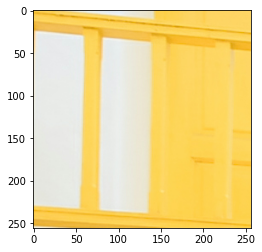

In [9]:

helper = None
test = split_single_image(image,(2,2),512)
# print(test.shape[0])
for i in range(test.shape[0]):
    plt.imshow(tf.cast(test[i],tf.uint16))
plt.imshow(tf.cast(test[3],tf.uint16))
save_tiles_to_png("./downloaded_images/test/1.jpeg")

In [3]:
import gc
counter = 0 
for filename in file_names:
    # t = filename.numpy()
    # print(filename)
    save_tiles_to_png(filename, shape=256, amount_of_tiles=(1,1),overlap=0, )
    if counter%16==0:
        gc.collect() 
        time.sleep(0.1)
    if counter%400==0:
        gc.collect() 
        time.sleep(1)

In [9]:
@tf.function(experimental_relax_shapes=True, jit_compile=True)
def create_tile_from_random_part(image: tf.Tensor, location: str, file_name: str, shape: int =256):
    X = np.random.randint(0, image[:].shape[0]-shape)
    Y = np.random.randint(0, image[:].shape[1]-shape)
    
    temp = image[X:X+shape, Y:Y+shape,:]
    temp = tf.io.encode_png(temp)
    tf.io.write_file(location+file_name+".png", temp)
    
def get_image_to_function(file_path: str, location: str, file_name: str, shape: int =256):
    image = tf.io.read_file(file_path)
    image = tf.io.decode_image(image)
    
    create_tile_from_random_part(image, location, file_name, shape)
    

for i in range(1,3):
    for j, filename in enumerate(file_names):
        # print("hello")
        get_image_to_function(filename, "./experimental/", str(i*j))


split images in only 6 peices begin in a random part of the image where you can do - n*3 and same for the bottom but that would only be n\*2 although for each batch we could change that 
so the image would be 


[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],</br>
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],</br>
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],</br>
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],</br>
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],</br>
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],</br>
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],</br>
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],</br>
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],</br>
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],</br>
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],</br>
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.] 
</br></br></br>

[0., 0., 0.], </br>
[0., 0., 0.] </br>

*6 but it would start at a random point int the image  

In [5]:
tf.function(jit_compile=True)
def split_image_in_tiles(image, tile_size):
    # if type(tile_size) == int:
    #     tile_Size = tile_size[tile_size, tile_size]         
    # else: tile_Size=tile_size
    # tf.constant(tile_Size, int)
    
    X = image.shape[0]
    Y = image.shape[1]
       
    # padded_X = X+X%tile_size
    # padded_Y = Y+Y%tile_size
    
    # padded_image = tf.image.resize_with_pad(image, padded_X, padded_Y)
    
    for x_i, x in enumerate(range(0, X-tile_size*2, tile_size)):
        for y_i, y in enumerate(range(0, Y-tile_size*2, tile_size)):
            yield image[x:tile_size*(x_i+1), y:tile_size*(y_i+1)]
        

In [4]:
for x_i, x in enumerate(range(0,256,16)):
    for y_i, y in enumerate(range(0,256,16)):
        # yield padded_image[x:tile_size*x+1]
        print(f"x = {16*(x_i+1)} and y = {16*(y_i+1)}")

x = 16 and y = 16
x = 16 and y = 32
x = 16 and y = 48
x = 16 and y = 64
x = 16 and y = 80
x = 16 and y = 96
x = 16 and y = 112
x = 16 and y = 128
x = 16 and y = 144
x = 16 and y = 160
x = 16 and y = 176
x = 16 and y = 192
x = 16 and y = 208
x = 16 and y = 224
x = 16 and y = 240
x = 16 and y = 256
x = 32 and y = 16
x = 32 and y = 32
x = 32 and y = 48
x = 32 and y = 64
x = 32 and y = 80
x = 32 and y = 96
x = 32 and y = 112
x = 32 and y = 128
x = 32 and y = 144
x = 32 and y = 160
x = 32 and y = 176
x = 32 and y = 192
x = 32 and y = 208
x = 32 and y = 224
x = 32 and y = 240
x = 32 and y = 256
x = 48 and y = 16
x = 48 and y = 32
x = 48 and y = 48
x = 48 and y = 64
x = 48 and y = 80
x = 48 and y = 96
x = 48 and y = 112
x = 48 and y = 128
x = 48 and y = 144
x = 48 and y = 160
x = 48 and y = 176
x = 48 and y = 192
x = 48 and y = 208
x = 48 and y = 224
x = 48 and y = 240
x = 48 and y = 256
x = 64 and y = 16
x = 64 and y = 32
x = 64 and y = 48
x = 64 and y = 64
x = 64 and y = 80
x = 64 and y = 9

In [6]:

def from_path_to_saved_file(file_location, save_path="./experimental/", tile_size=256):
    file = tf.io.read_file(file_location)
    try:
        image = tf.image.decode_jpeg(file)
    except:
        image = tf.image.decode_png(file)
    tiles = split_image_in_tiles(image, tile_size)
    global counter

    for tile in tiles:
        # plt.imshow(tf.cast(tiles[i],tf.uint16).numpy())
        
        # file_name = 
        tile_e = tf.io.encode_png(tf.cast(tile,tf.uint8))
        output_path = save_path+str(counter)+".png"
        tf.io.write_file(output_path, tile_e)
        counter+=1
    return "something"
counter = 0

In [7]:
for filename in file_names:
    from_path_to_saved_file(filename)
    # input() #this line is more to stop it for debugging reasons